CHAUVIN \\
Paul \\
paulchauvin97@gmail.com

# Spectral Clustering


In this exercise, you will implement spectral clustering and try it on diffent kinds of data, for instance:

* N-blob: Random points in $\mathbb{R}^2$ according to N Gaussian distributions with different means;

* Two moons: Random points shaped as two intertwined moons; 

* Point and circle: random points from a concentrated Gaussian point in the middle and a wide circle around it.

The first step after generating the data is to construct a graph and, for that, we need a similarity function. In this exercise we will use the following similarity:

$$
d(x_i, x_j) = \exp\left(-\frac{||x_i-x_j||_2^2}{2\sigma^2}\right)
$$

Using this similarity, we can compute the weight matrix W representing the graph, compute the graph Laplacian L and finally use its eigenvectors for clustering.


# Scripts part of the files sent by the teachers: no modification made on them

## imports

In [1]:
!pip install networkx==2.2
!pip install matplotlib==2.2.3
!pip install --upgrade scipy

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as sd
from scipy.sparse.csgraph import minimum_spanning_tree
import sys
import os
from sklearn.cluster import KMeans
import sklearn.metrics as skm
import sklearn.datasets as skd
from skimage import io
import networkx as nx
from scipy.sparse import linalg 
from scipy.sparse.linalg import eigs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## build_similarity.py

In [2]:
"""
Functions to build and visualize similarity graphs, and to choose epsilon in epsilon-graphs.
"""
def build_similarity_graph(X, var=1.0, eps=0.0, k=0):
    """
    TO BE COMPLETED.

    Computes the similarity matrix for a given dataset of samples. If k=0, builds epsilon graph. Otherwise, builds
    kNN graph.

    :param X:    (n x m) matrix of m-dimensional samples
    :param var:  the sigma value for the exponential function, already squared
    :param eps:  threshold eps for epsilon graphs
    :param k:    the number of neighbours k for k-nn. If zero, use epsilon-graph
    :return:
        W: (n x n) dimensional matrix representing the adjacency matrix of the graph
    """
    n = X.shape[0]
    W = np.zeros((n, n))

    """
    Build similarity graph, before threshold or kNN
    similarities: (n x n) matrix with similarities between all possible couples of points.
    The similarity function is d(x,y)=exp(-||x-y||^2/(2*var))
    """
  
    similarities = np.zeros((n, n))

    # If epsilon graph
    if k == 0:
        """
        compute an epsilon graph from the similarities             
        for each node x_i, an epsilon graph has weights             
        w_ij = d(x_i,x_j) when w_ij >= eps, and 0 otherwise          
        """
        pass

    # If kNN graph
    if k != 0:
        """
        compute a k-nn graph from the similarities                   
        for each node x_i, a k-nn graph has weights                  
        w_ij = d(x_i,x_j) for the k closest nodes to x_i, and 0     
        for all the k-n remaining nodes                              
        Remember to remove self similarity and                       
        make the graph undirected                                    
        """
        pass

    return W


def plot_similarity_graph(X, Y, var=1.0, eps=0.0, k=5):
    """
    Function to plot the similarity graph, given data and parameters.

    :param X: (n x m) matrix of m-dimensional samples
    :param Y: (n, ) vector with cluster assignments
    :param var:  the sigma value for the exponential function, already squared
    :param eps:  threshold eps for epsilon graphs
    :param k:    the number of neighbours k for k-nn
    :return:
    """
    # use the build_similarity_graph function to build the graph W
    # W: (n x n) dimensional matrix representing the adjacency matrix of the graph
    W = build_similarity_graph(X, var, eps, k)

    # Use auxiliary function to plot
    plot_graph_matrix(X, Y, W)


def how_to_choose_epsilon():
    """
    TO BE COMPLETED.

    Consider the distance matrix with entries dist(x_i, x_j) (the euclidean distance between x_i and x_j)
    representing a fully connected graph.
    One way to choose the parameter epsilon to build a graph is to choose the maximum value of dist(x_i, x_j) where
    (i,j) is an edge that is present in the minimal spanning tree of the fully connected graph. Then, the threshold
    epsilon can be chosen as exp(-dist(x_i, x_j)**2.0/(2*sigma^2)).
    """
    # the number of samples to generate
    num_samples = 100

    # the option necessary for worst_case_blob, try different values
    gen_pam = 0.0  # to understand the meaning of the parameter, read worst_case_blob in generate_data.py

    # get blob data
    X, Y = worst_case_blob(num_samples, gen_pam)
    # X, Y = two_moons(num_samples)

    """
     use the distance function and the min_span_tree function to build the minimal spanning tree min_tree                   
     - var: the exponential_euclidean's sigma2 parameter          
     - dists: (n x n) matrix with euclidean distance between all possible couples of points                   
     - min_tree: (n x n) indicator matrix for the edges in the minimal spanning tree                           
    """
    var = 1.0
    dists = None  # dists[i, j] = euclidean distance between x_i and x_j
    min_tree = min_span_tree(dists)

    """
    set threshold epsilon to the max weight in min_tree 
    """
    distance_threshold = None
    # eps = np.exp(-distance_threshold**2.0/(2*var))

    """
    use the build_similarity_graph function to build the graph W  
     W: (n x n) dimensional matrix representing                    
        the adjacency matrix of the graph
       use plot_graph_matrix to plot the graph                    
    """
    W = build_similarity_graph(X, var=var, eps=eps, k=0)
    plot_graph_matrix(X, Y, W)


## spectral_clustering.py

In [3]:
def build_laplacian(W, laplacian_normalization=""):
    """
    Compute graph Laplacian.

    :param W: adjacency matrix
    :param laplacian_normalization:  string selecting which version of the laplacian matrix to construct
                                     'unn':  unnormalized,
                                     'sym': symmetric normalization
                                     'rw':  random-walk normalization
    :return: L: (n x n) dimensional matrix representing the Laplacian of the graph
    """
    return np.zeros(W.shape)


def spectral_clustering(L, chosen_eig_indices, num_classes=2):
    """
    :param L: Graph Laplacian (standard or normalized)
    :param chosen_eig_indices: indices of eigenvectors to use for clustering
    :param num_classes: number of clusters to compute (defaults to 2)
    :return: Y: Cluster assignments
    """

    """
    Use the function scipy.linalg.eig or the function scipy.sparse.linalg.eigs to compute:
    U = (n x n) eigenvector matrix           (sorted)
    E = (n x n) eigenvalue diagonal matrix   (sorted)
    """
    E = None
    U = None

    """
    compute the clustering assignment from the eigenvectors        
    Y = (n x 1) cluster assignments [0,1,...,c-1]                   
    """
    Y = None
    return Y


def two_blobs_clustering():
    """
    TO BE COMPLETED

    Clustering of two blobs. Used in questions 2.1 and 2.2
    """

    # Get data and compute number of classes
    X, Y = blobs(600, n_blobs=2, blob_var=0.15, surplus=0)
    num_classes = len(np.unique(Y))

    """
    Choose parameters
    """
    k = 3
    var = 1.0  # exponential_euclidean's sigma^2

    laplacian_normalization = 'unn'
    chosen_eig_indices = [1, 2, 3]    # indices of the ordered eigenvalues to pick

    # build laplacian
    W = build_similarity_graph(X, var=var, k=k)
    L = build_laplacian(W, laplacian_normalization)

    # run spectral clustering
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes=num_classes)

    # Plot results
    plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))


def choose_eigenvalues(eigenvalues):
    """
    Function to choose the indices of which eigenvalues to use for clustering.

    :param eigenvalues: sorted eigenvalues (in ascending order)
    :return: indices of the eigenvalues to use
    """
    eig_ind = [1, 2, 3]
    return eig_ind


def spectral_clustering_adaptive(L, num_classes=2):
    """
    Spectral clustering that adaptively chooses which eigenvalues to use.
    :param L: Graph Laplacian (standard or normalized)
    :param num_classes: number of clusters to compute (defaults to 2)
    :return: Y: Cluster assignments
    """

    """
    Use the function scipy.linalg.eig or the function scipy.linalg.eigs to compute:
    U = (n x n) eigenvector matrix           (sorted)
    E = (n x n) eigenvalue diagonal matrix   (sorted)
    """
    E = None
    U = None

    """
    compute the clustering assignment from the eigenvectors   
    Y = (n x 1) cluster assignments [1,2,...,c]                   
    """
    Y = None
    return Y


def find_the_bend():
    """
    TO BE COMPLETED

    Used in question 2.3
    :return:
    """

    # the number of samples to generate
    num_samples = 600

    # Generate blobs and compute number of clusters
    X, Y = blobs(num_samples, 4, 0.2)
    num_classes = len(np.unique(Y))

    """
    Choose parameters
    """
    k = 2
    var = 1.0  # exponential_euclidean's sigma^2
    laplacian_normalization = ''  # either 'unn'normalized, 'sym'metric normalization or 'rw' random-walk normalization


    # build laplacian
    W = build_similarity_graph(X, var=var, k=k)
    L = build_laplacian(W, laplacian_normalization)

    """
    compute first 15 eigenvalues and call choose_eigenvalues() to choose which ones to use. 
    """
    eigenvalues = np.zeros(15)
    chosen_eig_indices = choose_eigenvalues(eigenvalues)  # indices of the ordered eigenvalues to pick


    """
    compute spectral clustering solution using a non-adaptive method first, and an adaptive one after (see handout) 
    Y_rec = (n x 1) cluster assignments [0,1,..., c-1]    
    """
    # run spectral clustering
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes=num_classes)
    Y_rec_adaptive = spectral_clustering_adaptive(L, num_classes=num_classes)

    plot_the_bend(X, Y, L, Y_rec, eigenvalues)


def two_moons_clustering():
    """
    TO BE COMPLETED.

    Used in question 2.7
    """
    # Generate data and compute number of clusters
    X, Y = two_moons(600)
    num_classes = len(np.unique(Y))

    """
    Choose parameters
    """
    k = 3
    var = 1.0  # exponential_euclidean's sigma^2

    laplacian_normalization = 'unn'
    chosen_eig_indices = [1, 2, 3]    # indices of the ordered eigenvalues to pick


    # build laplacian
    W = build_similarity_graph(X, var=var, k=k)
    L = build_laplacian(W, laplacian_normalization)
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes=num_classes)

    plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))


def point_and_circle_clustering():
    """
    TO BE COMPLETED.

    Used in question 2.8
    """
    # Generate data and compute number of clusters
    X, Y = point_and_circle(600)
    num_classes = len(np.unique(Y))

    """
    Choose parameters
    """
    k = 3
    var = 1.0  # exponential_euclidean's sigma^2

    chosen_eig_indices = [1, 2, 3]    # indices of the ordered eigenvalues to pick


    # build laplacian
    W = build_similarity_graph(X, var=var, k=k)
    L_unn = build_laplacian(W, 'unn')
    L_norm = build_laplacian(W, 'sym')

    Y_unn = spectral_clustering(L_unn, chosen_eig_indices, num_classes=num_classes)
    Y_norm = spectral_clustering(L_norm, chosen_eig_indices, num_classes=num_classes)

    plot_clustering_result(X, Y, L_unn, Y_unn, Y_norm, 1)


def parameter_sensitivity():
    """
    TO BE COMPLETED.

    A function to test spectral clustering sensitivity to parameter choice.

    Used in question 2.9
    """
    # the number of samples to generate
    num_samples = 500

    """
    Choose parameters
    """
    var = 1.0  # exponential_euclidean's sigma^2
    laplacian_normalization = 'unn'
    chosen_eig_indices = [1, 2]

    """
    Choose candidate parameters
    """
    parameter_candidate = [1, 2]  # the number of neighbours for the graph or the epsilon threshold
    parameter_performance = []

    for k in parameter_candidate:
        # Generate data
        X, Y = two_moons(num_samples, 1, 0.02)
        num_classes = len(np.unique(Y))

        W = build_similarity_graph(X, k=k)
        L = build_laplacian(W, laplacian_normalization)

        Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes)

        parameter_performance += [skm.adjusted_rand_score(Y, Y_rec)]

    plt.figure()
    plt.plot(parameter_candidate, parameter_performance)
    plt.title('parameter sensitivity')
    plt.show()

## image_segmentation.py

In [4]:
def image_segmentation(input_img='four_elements.bmp'):
    """
    TO BE COMPLETED

    Function to perform image segmentation.

    :param input_img: name of the image file in /data (e.g. 'four_elements.bmp')
    """
    filename = os.path.join('data', input_img)

    X = io.imread(filename)
    X = (X - np.min(X)) / (np.max(X) - np.min(X))

    im_side = np.size(X, 1)
    Xr = X.reshape(im_side ** 2, 3)
    """
    Y_rec should contain an index from 0 to c-1 where c is the     
     number of segments you want to split the image into          
    """

    """
    Choose parameters
    """
    var = 1.0
    k = 2
    laplacian_normalization = 'unn'
    chosen_eig_indices = [1]
    num_classes = 1

    W = build_similarity_graph(X, var=var, k=k)
    L = build_laplacian(W, laplacian_normalization)
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes=num_classes)

    plt.figure()

    plt.subplot(1, 2, 1)
    plt.imshow(X)

    plt.subplot(1, 2, 2)
    Y_rec = Y_rec.reshape(im_side, im_side)
    plt.imshow(Y_rec)

    plt.show()

## utils.py

In [2]:
def plot_clusters(X, Y, fignum='data', show=False):
    """
    Function to plot clusters.

    :param X: (num_samples, 2) matrix of 2-dimensional samples
    :param Y:  (num_samples, ) vector of cluster assignment
    :param fignum: figure name
    :param show: If True, call plt.show()
    :return:
    """
    K = Y.max() + 1
    plt.figure(fignum)
    for k in range(K):
        plt.plot(X[Y == k, 0], X[Y == k, 1], 'o')
    if show:
        plt.show()


def min_span_tree(W):
    """
    :param W: (n x n) adjacency matrix representing the graph
    :return: T: (n x n) matrix such that T[i,j] = True if the edge (i, j) is in the min spanning tree, and
                T[i, j] = False otherwise
    """
    tree = minimum_spanning_tree(W).toarray()
    T = tree != 0
    return T


def plot_graph_matrix(X, Y, W, fignum='graph matrix'):
    plt.figure(fignum)
    plt.clf()
    plt.subplot(1,2,1)
    plot_edges_and_points(X,Y,W)
    plt.subplot(1,2,2)
    plt.imshow(W, extent=[0, 1, 0, 1])
    plt.show()


def plot_edges_and_points(X, Y, W,title=''):
    colors=['go-', 'ro-', 'co-', 'ko-', 'yo-', 'mo-']
    n=len(X)
    G=nx.from_numpy_matrix(W)
    nx.draw_networkx_edges(G, X)
    for i in range(n):
        plt.plot(X[i, 0], X[i, 1], colors[int(Y[i])])
    plt.title(title)
    plt.axis('equal')


def plot_clustering_result(X, Y, W, spectral_labels, kmeans_labels, normalized_switch=0):
    plt.figure()
    plt.clf()
    plt.subplot(1, 3, 1)
    plot_edges_and_points(X, Y, W, 'ground truth')
    plt.subplot(1, 3, 2)
    if normalized_switch:
        plot_edges_and_points(X, spectral_labels, W, 'unnormalized laplacian')
    else:
        plot_edges_and_points(X, spectral_labels, W, 'spectral clustering')
    plt.subplot(1, 3, 3)
    if normalized_switch:
        plot_edges_and_points(X, kmeans_labels, W, 'normalized laplacian')
    else:
        plot_edges_and_points(X, kmeans_labels, W, 'k-means')
    plt.show()


def plot_the_bend(X, Y, W, spectral_labels, eigenvalues_sorted):
    plt.figure()
    plt.clf()
    plt.subplot(1, 3, 1)
    plot_edges_and_points(X, Y, W, 'ground truth')

    plt.subplot(1, 3, 2)
    plot_edges_and_points(X, spectral_labels, W, 'spectral clustering')

    plt.subplot(1, 3, 3)
    plt.plot(np.arange(0, len(eigenvalues_sorted), 1), eigenvalues_sorted, 'v:')
    plt.show()

## generate_data.py

(600, 2)


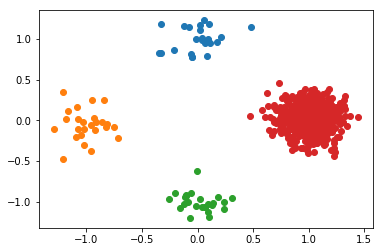

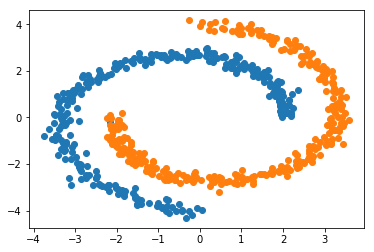

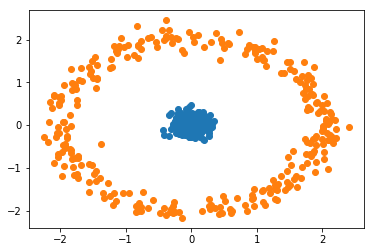

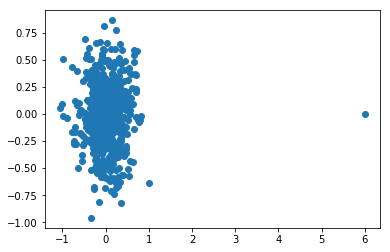

In [3]:
def worst_case_blob(num_samples, delta=5):
    """
    Generates a single blob.

    :param num_samples: number of samples to create in the blob
    :param delta:
    :return: X,  (num_samples, 2) matrix of 2-dimensional samples
             Y,  (num_samples, ) vector of "true" cluster assignment
    """
    blob_var = 0.3
    # X: matrix of shape (num_samples, 2)
    # Y: vector of shape (num_samples, )
    X, Y = skd.make_blobs(n_samples=num_samples, n_features=2, centers=np.column_stack((0, 0)), cluster_std=blob_var)
    X[-1] = [np.max(X) + delta, 0]
    return [X, Y]


def blobs(num_samples, n_blobs=2, blob_var=0.15, surplus=0):
    """
    Creates N gaussian blobs evenly spaced across a circle.

    :param num_samples: number of samples to create in the dataset
    :param n_blobs:      how many separate blobs to create
    :param blob_var:    gaussian variance of each blob
    :param surplus:     number of extra samples added to first blob to create unbalanced classes
    :return: X,  (num_samples, 2) matrix of 2-dimensional samples
             Y,  (num_samples, ) vector of "true" cluster assignment
    """
    # data array
    X = np.zeros((num_samples, 2))
    # array containing the indices of the true clusters
    Y = np.zeros(num_samples, dtype=np.int32)

    # generate data
    block_size = (num_samples-surplus)//n_blobs

    for ii in range(1, n_blobs+1):
        start_index = (ii - 1) * block_size
        end_index = ii * block_size
        if ii == n_blobs:
            end_index = num_samples
        Y[start_index:end_index] = ii - 1
        nn = end_index - start_index

        X[start_index:end_index, 0] = np.cos(2*np.pi*ii/n_blobs) + blob_var*np.random.randn(nn)
        X[start_index:end_index, 1] = np.sin(2*np.pi*ii/n_blobs) + blob_var*np.random.randn(nn)
    return X, Y


def two_moons(num_samples, moon_radius=2.0, moon_var=0.02):
    """
    Creates two intertwined moons

    :param num_samples: number of samples to create in the dataset
    :param moon_radius: radius of the moons
    :param moon_var:    variance of the moons
    :return: X,  (num_samples, 2) matrix of 2-dimensional samples
             Y,  (num_samples, ) vector of "true" cluster assignment
    """
    X = np.zeros((num_samples, 2))

    for i in range(int(num_samples / 2)):
        r = moon_radius + 4 * i / num_samples
        t = i * 3 / num_samples * np.pi
        X[i, 0] = r * np.cos(t)
        X[i, 1] = r * np.sin(t)
        X[i + int(num_samples / 2), 0] = r * np.cos(t + np.pi)
        X[i + int(num_samples / 2), 1] = r * np.sin(t + np.pi)

    X = X + np.sqrt(moon_var) * np.random.normal(size=(num_samples, 2))
    Y = np.ones(num_samples)
    Y[:int(num_samples / 2) + 1] = 0
    return [X, Y.astype(int)]


def point_and_circle(num_samples, radius=2.0, sigma=0.15):
    """
    Creates point and circle

    :param num_samples: number of samples to create in the dataset
    :param sigma:       variance
    :param radius:      radius of the circle
    :return: X,  (num_samples, 2) matrix of 2-dimensional samples
             Y,  (num_samples, ) vector of "true" cluster assignment in {0, ..., c-1}
    """
    # data array
    X = np.zeros((num_samples, 2))
    # array containing the indices of the true clusters
    Y = np.zeros(num_samples, dtype=np.int32)

    # generate data
    block_size = num_samples // 2
    for ii in range(1, 3):
        start_index = (ii - 1) * block_size
        end_index = ii * block_size
        if ii == 3:
            end_index = num_samples
        Y[start_index:end_index] = ii - 1
        nn = end_index - start_index
        if ii == 1:
            X[start_index:end_index, 0] = sigma*np.random.randn(nn)
            X[start_index:end_index, 1] = sigma*np.random.randn(nn)
        else:
            angle = 2*np.pi * np.random.uniform(size=nn) - np.pi
            X[start_index:end_index, 0] = radius*np.cos(angle) + sigma * np.random.randn(nn)
            X[start_index:end_index, 1] = radius*np.sin(angle) + sigma * np.random.randn(nn)
    return X, Y


# --------------------------------
# Visualizing the data
# --------------------------------

blobs_data, blobs_clusters = blobs(600, n_blobs=4, surplus=500)
moons_data, moons_clusters = two_moons(600)
point_circle_data, point_circle_clusters = point_and_circle(600)
worst_blobs_data, worst_blobs_clusters = worst_case_blob(600, 5.0)

print(blobs_data.shape)
# print((blobs_clusters == 0).sum())
# print((blobs_clusters == 1).sum())
# print((blobs_clusters == 2).sum())
# print((blobs_clusters == 3).sum())

plot_clusters(blobs_data, blobs_clusters, 'blobs', show=True)
plot_clusters(moons_data, moons_clusters, 'moons', show=False)
plot_clusters(point_circle_data, point_circle_clusters, 'point and circle', show=False)
plot_clusters(worst_blobs_data, worst_blobs_clusters, 'worst case blob', show=True)


# TP

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Generating the data

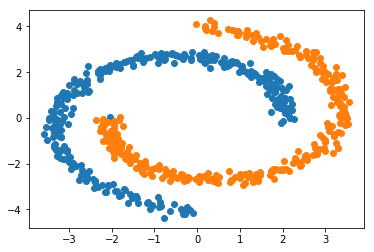

In [5]:
# Example

for fn in [two_moons]: # worst_case_blob, point_and_circle, blobs]:   try also [two_moons, worst_case_blob, point_and_circle, blobs]
    X, Y = fn(num_samples=600)
    plot_clusters(X, Y, fignum=str(fn))
    
# You can check the documentation of each function to see the optional parameters, e.g.:
#worst_case_blob?

## Building similarity graph

In [6]:
def build_similarity_graph(X, var=1.0, eps=0.0, k=0):
    """
    TO BE COMPLETED.

    Computes the similarity matrix for a given dataset of samples. 
    If k=0, builds epsilon graph. 
    Otherwise, builds kNN graph.

    Parameters
    ----------
    X : numpy array
        (n x m) matrix of m-dimensional samples
    var : double 
        the sigma value for the exponential function, already squared
    eps : double
        threshold for epsilon graphs
    k : int
        The number of neighbours k for k-nn. If zero, use epsilon-graph

    Returns
    -------
        W: (n x n) dimensional matrix representing the weight matrix of the graph
    """
    n = X.shape[0]
    W = np.zeros((n, n))

    """
    Build similarity graph, before threshold or kNN
    similarities: (n x n) matrix with similarities between all possible couples of points.
    The similarity function is d(x,y)=exp(-||x-y||^2/(2*var))
    """
  
    similarities = np.zeros((n, n))
################################################################################
#completed
    for i in range(n):
        for j in range(n):
            similarities[i, j] = np.exp(-np.linalg.norm(X[i] - X[j])**2 / (2*var))
################################################################################
  
    # If epsilon graph
    if k == 0:
        """
        compute an epsilon graph from the similarities             
        for each node x_i, an epsilon graph has weights             
        w_ij = d(x_i,x_j) when w_ij >= eps, and 0 otherwise          
        """
################################################################################
#completed
        W = np.where(similarities >= eps, similarities, 0)
################################################################################

    # If kNN graph
    elif k != 0:
        """
        compute a k-nn graph from the similarities                   
        for each node x_i, a k-nn graph has weights                  
        w_ij = d(x_i,x_j) for the k closest nodes to x_i, and 0     
        for all the k-n remaining nodes                              
        Remember to remove self similarity and                       
        make the graph undirected                                    
        """
################################################################################
#completed        
        for i in range(n):
            k_indices = np.argsort(-similarities[i,:])[1:k+1]
            for j in k_indices:
                W[i, j] = similarities[i, j]
                W[j, i] = similarities[j, i]
          
################################################################################

    return W


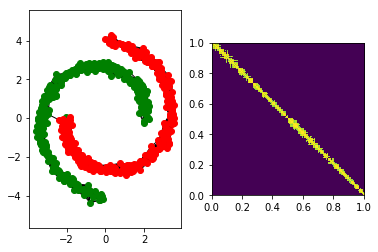

In [7]:
# Example

W = build_similarity_graph(X, eps = 0.8)
#W[0, 599] = 1    # add two placeholder edges to reproduce example picture
#W[10, 500] = 1   # 


plot_graph_matrix(X, Y, W)  # shows the graph and the visualization of W

## Computing the Laplacian

In [8]:
def build_laplacian(W, laplacian_normalization='unn'):
    """
    Compute graph Laplacian.

    Parameters
    ----------
    W : numpy array
        Adjacency matrix (n x n)
    laplacian_normalization : str
        String selecting which version of the laplacian matrix to construct.
            'unn':  unnormalized,
            'sym': symmetric normalization
            'rw':  random-walk normalization   

    Returns
    -------
    L: (n x n) dimensional matrix representing the Laplacian of the graph
    """
    n = W.shape[0]
    D = np.zeros((n,n))
    
    for i in range(n):
        D[i,i] = np.sum(W[:,i])
    
    if laplacian_normalization == "unn":
        L = D - W
    
    if laplacian_normalization == "rw":
        L = np.eye(n) - np.diag([1/D[i,i] for i in range(n)])@W
    
    if laplacian_normalization == "sym":
        sqrt_inv_D = np.diag([1/np.sqrt(D[i,i]) for i in range(n)])
        L = np.eye(n) - (sqrt_inv_D@W)@sqrt_inv_D
  
    return L

## Clustering

In [31]:
def spectral_clustering(L, chosen_eig_indices=None, num_classes=2):
    """
    Parameters
    ----------
    L : numpy array
        Graph Laplacian (standard or normalized)
    choosen_eig_indices : list or None
        Indices of eigenvectors to use for clustering. 
        If None, use adaptive choice of eigenvectors.
    num_classes : int 
        Number of clusters to compute (defaults to 2)


    Returns
    -------
    Y : numpy array (num_samples, )
        Cluster assignments
    """

    """
    Use the function scipy.linalg.eig or the function scipy.sparse.linalg.eigs to compute:
    U = (n x n) eigenvector matrix           (sorted)
    E = (n x n) eigenvalue diagonal matrix   (sorted)
    """

    E, U = scipy.linalg.eig(L)
    idx = np.argsort(E)
    E = E[idx]
    E = E.real
    U = U.real
    U = U[:, idx]

    if chosen_eig_indices is None:
        chosen_eig_indices = np.arange(num_classes)
    
    U_sub = U[:, chosen_eig_indices]

    """
    compute the clustering assignment from the eigenvectors        
    Y = (n x 1) cluster assignments in [0,1,...,num_classes-1]                   
    """
    kmeans = KMeans(n_clusters=num_classes)
    Y = kmeans.fit_predict(U_sub)
    return Y

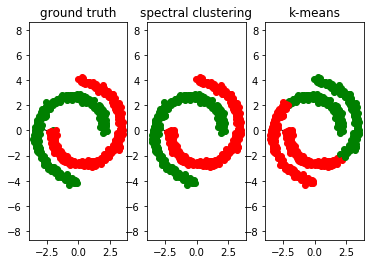

In [10]:
# Example

num_classes = 2
L = build_laplacian(W)
Y_rec = spectral_clustering(L, chosen_eig_indices=[1, 2], num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

## Parameter sensitivity 

In [59]:
def parameter_sensitivity():
    """
    TO BE COMPLETED.

    A function to test spectral clustering sensitivity to parameter choice.
    """
    # the number of samples to generate
    num_samples = 500

    """
    Choose parameters
    """
    var = 1.0  # exponential_euclidean's sigma^2
    laplacian_normalization = 'unn'
    chosen_eig_indices = None

    """
    Choose candidate parameters
    """
    parameter_type = 'eps' # choose between 'k' or 'eps'
    parameter_candidate = np.arange(0,2,0.05)  # the number of neighbours for the graph (if 'k')
    #parameter_candidate = [1.0]  # or the epsilon threshold (if 'eps')
    parameter_performance = []

    for parameter in parameter_candidate:
        # Generate data
        X, Y = two_moons(num_samples, 1, 0.02)
        num_classes = len(np.unique(Y))
        
        parameter_wrap = {parameter_type: parameter}
        
        W = build_similarity_graph(X, **parameter_wrap)
        L = build_laplacian(W, laplacian_normalization)

        Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes)

        parameter_performance += [skm.adjusted_rand_score(Y, Y_rec)]

    plt.figure()
    plt.plot(parameter_candidate, parameter_performance)
    plt.title(f'parameter sensitivity ({parameter_type})')
    plt.show()

## Image segmentation

In [12]:
path_to_data = '/content/drive/MyDrive/Cours_MVA/2nd semestre/Graphs in ML/spectral_clustering/data/'

def image_segmentation(input_img = path_to_data + 'four_elements.bmp', var = 1.0, eps = 0, k = 0, num_classes = 2, laplacian_normalization = 'unn', chosen_eig_indices = None):
    """
    TO BE COMPLETED

    Function to perform image segmentation.

    :param input_img: name of the image file in /data (e.g. 'four_elements.bmp' or 'fruit_salad.bmp')
    """
    filename = os.path.join('data', input_img)

    X = io.imread(filename)
    X = (X - np.min(X)) / (np.max(X) - np.min(X))

    im_side = np.size(X, 1)
    Xr = X.reshape(im_side ** 2, 3)
    """
    Y_rec should contain an index from 0 to c-1 where c is the     
     number of segments you want to split the image into          
    """

    W = build_similarity_graph(Xr, var = var, k = k, eps = eps)
    L = build_laplacian(W, laplacian_normalization)
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes = num_classes)

    plt.figure()

    plt.subplot(1, 2, 1)
    plt.imshow(X)

    plt.subplot(1, 2, 2)
    Y_rec = Y_rec.reshape(im_side, im_side)
    plt.imshow(Y_rec)

    plt.show()

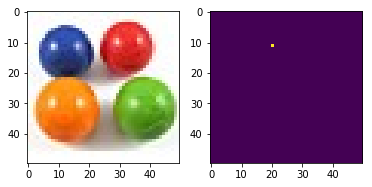

In [14]:
image_segmentation()

# Questions

### Q1.1: What is the purpose of the option parameter in `worst_case_blob`?

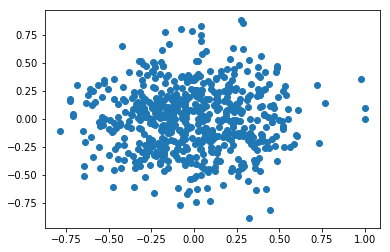

In [13]:
for fn in [worst_case_blob]: 
    X, Y = fn(num_samples=600,delta=0)
    plot_clusters(X, Y, fignum=str(fn))

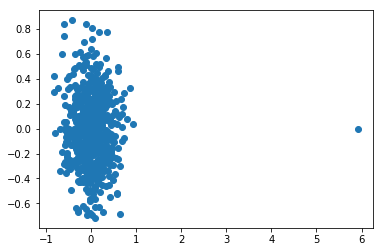

In [14]:
for fn in [worst_case_blob]:  
    X, Y = fn(num_samples=600,delta=5)
    plot_clusters(X, Y, fignum=str(fn))

The delta parameter establishes the gap between two created blobs. The function produces a single blob consisting of num_samples points and the delta value determines the distance between the final sample of the produced blob and the starting point of the subsequent blob. Hence, the delta enables to choose how much of an outlier would be the last sample.

### Q1.2: While varying the parameter of `worst_case_blob`, try to select a value of $\epsilon$ that keeps the graph connected (the function `min_span_tree` can help you). What happens? Can you tell when it is a bad idea to use this approach?

()

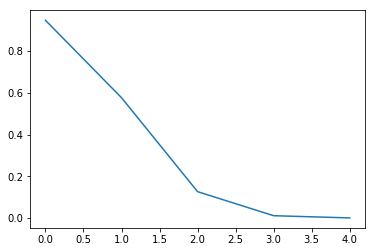

In [15]:
def eps_value():
  eps = np.zeros(5)
  for i in range(5):
      X, Y = worst_case_blob(num_samples=600, delta=i)
      similarities = build_similarity_graph(X)
      mst = min_span_tree(-similarities)
      smallest_similarity = similarities[np.where(mst==True)]
      eps[i] = np.min(smallest_similarity)
  plt.plot(np.arange(5), eps, label="epsilon")
  return()

eps_value()

As the connection between the outlier and the blob becomes weaker, the highest value of epsilon that still results in a connected graph approaches zero. This is not desirable when there are two distinct groups with very little similarity, such as an outlier and a blob, as it would result in a nearly fully connected graph with nearly every vertex included.

### Q1.3: Is it important to build a connected graph? Compare k-NN to $\epsilon$-graphs with respect to the difficulty of building a connected graph.

If the graph is not connected, it naturally forms clusters, with each connected component being considered as a separate cluster. This can be handled by reformulating the Laplacian as a block-diagonal matrix, and assigning all the points in each block to the same cluster. This can be achieved by using the eigenvectors corresponding to the eigenvalue of 0, as they serve as indicator vectors. On the other hand, compared to epsilon-graphs, k-NN graphs are more challenging to keep connected. For instance, to have a connected graph in the previous example, one can take the epsilon value that only retains one connection between the outlier and the blob. However, for a k-NN graph, k would need to be equal to the number of samples in the blob plus one, resulting in all the samples in the blob connecting to the outlier. Hence, epsilon-graphs provide a more nuanced control over the connections between different parts, as one can select the desired level of connections.

### Q2.1: Build a graph starting from the data generated in `blobs`, and keep the graph connected. Use `spectral_clustering` to cluster the data. Motivate your choice on which eigenvectors to use and how you computed the clustering assignments from the eigenvectors. Now compute a similar clustering using the built-in k-means and compare the results.

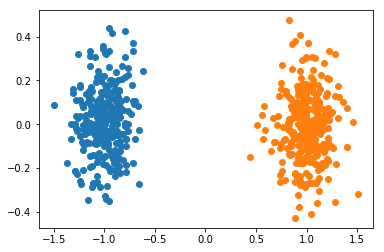

In [17]:
#blobs?
X, Y = blobs(num_samples=600)
plot_clusters(X, Y)

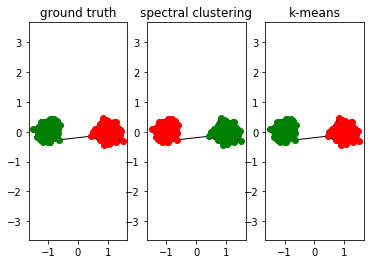

In [18]:
similarities = build_similarity_graph(X)
eps = np.min(np.extract(min_span_tree(-similarities),similarities))
W = build_similarity_graph(X,eps=eps)
L = build_laplacian(W)
Y_rec = spectral_clustering(L, chosen_eig_indices=[1], num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

In the course, we demonstrated that clustering could be achieved by utilizing the second eigenvector, where the cluster assignment for the i-th sample is determined based on the sign of its i-th component. In my code, I implemented K-means on this eigenvector only, so the boundary is not exactly zero, but the logic remains the same: samples with values less than the boundary belong to cluster 1, while those greater than the boundary belong to cluster 2.

Both methods are accurate in their cluster assignments as the two groups in question are linearly separable and symmetrical, which greatly assists the K-means algorithm.

### Q2.2: Build a graph starting from the data generated in `blobs`, but this time make it so that the two components are separated. How do you choose which eigenvectors to use in this case? Motivate your answer.

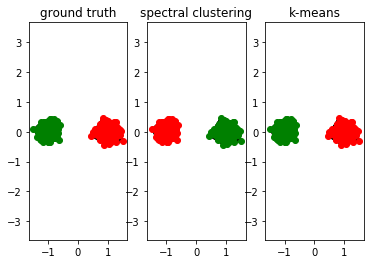

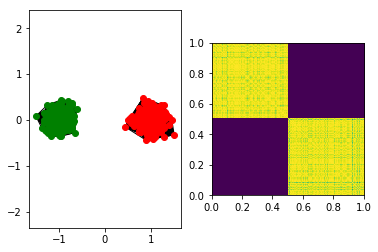

In [22]:
num_classes = 2

similarities = build_similarity_graph(X)
eps = np.min(np.extract(min_span_tree(-similarities),similarities))
W = build_similarity_graph(X,eps=eps*1.01)
L = build_laplacian(W)

Y_rec = spectral_clustering(L, chosen_eig_indices=[0,1], num_classes=num_classes)
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))
plot_graph_matrix(X, Y, W) 

In the case where the graph is divided into two connected components, the Laplacian matrix becomes block-diagonal. To determine the clusters, we can use the blocks. This can be done by selecting the first eigenvector of each block, which corresponds to the eigenvalue 0 and acts as an indicator vector. The 0th and 1st eigenvectors, when sorted by eigenvalue, can be used for this purpose.

### Q2.3: In the function spectral_clustering, implement an automatic strategy to choose the eigenvectors to use for clustering, when chosen_eig_indices=None. Explain your strategy. Generate a dataset with 4 blobs and test your function. What happens when the variance of the blobs increase?

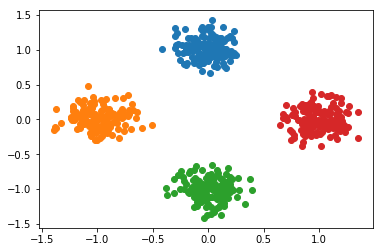

In [27]:
X, Y = blobs(num_samples=600, n_blobs=4, blob_var=0.15)
plot_clusters(X, Y)

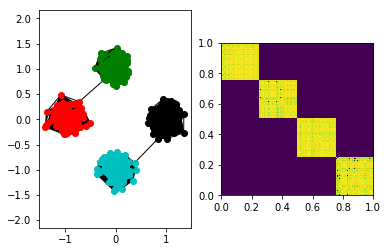

In [28]:
W = build_similarity_graph(X, var=1.0, eps=0.8, k=0)
plot_graph_matrix(X, Y, W) 

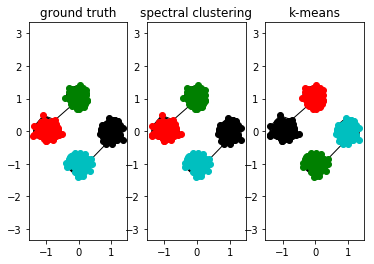

In [33]:
num_classes = 4
L = build_laplacian(W, laplacian_normalization='sym')
Y_rec = spectral_clustering(L, chosen_eig_indices= None , num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

When chosen_eig_indices is not specified, the approach is to determine the number of clusters by finding the largest gap in the eigenvalues. The eigenvectors that correspond to the eigenvalues before the gap are then selected and used in the spectral clustering algorithm. This allows us to find the optimal number of clusters without prior knowledge of the exact number.

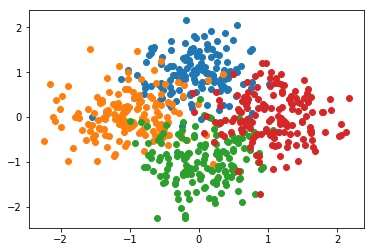

In [34]:
X, Y = blobs(num_samples=600, n_blobs=4, blob_var=0.5)
plot_clusters(X, Y)

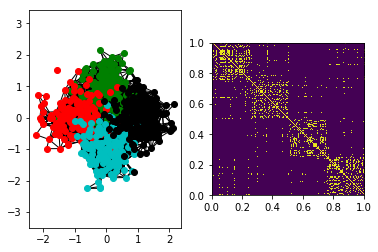

In [35]:
W = build_similarity_graph(X, var=1.0, eps=0.9, k=0)
plot_graph_matrix(X, Y, W) 

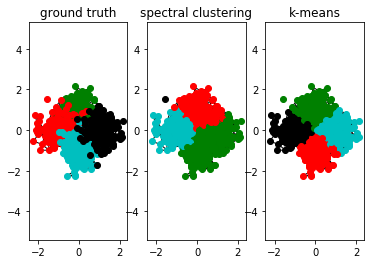

In [37]:
num_classes = 4
L = build_laplacian(W, laplacian_normalization='sym')
Y_rec = spectral_clustering(L, chosen_eig_indices= None , num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

When the variance increases, the gap between the different clusters are more difficult to identify. This can be explained by the fact that the eigenvalues tend to have same values, resulting in a hard distinction between all of them. the gap is harder to identify.

### Q2.4: When you built the cluster assignment, did you use thresholding, k-means or both? Do you have any opinion on when to use each?

I chose k-means because it is easier to implement (no threshold to determine)

### Q2.5: Generate `two_moons` data and compare spectral clustering to k-means. Do you notice any difference? Taking into consideration the graph structure, can you explain them?

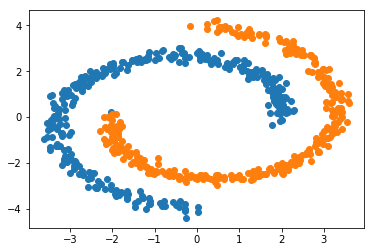

In [38]:
#two_moons?
X, Y = two_moons(num_samples=600)
plot_clusters(X, Y)

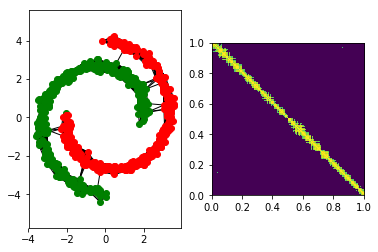

In [39]:
W = build_similarity_graph(X, var=1.0, eps=0.7, k=0)
plot_graph_matrix(X, Y, W)

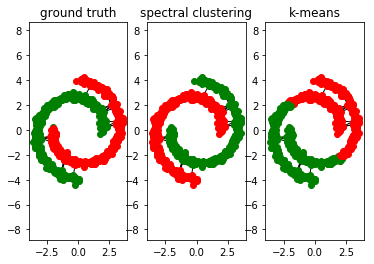

In [41]:
num_classes = 2
L = build_laplacian(W, laplacian_normalization='sym')
Y_rec = spectral_clustering(L, chosen_eig_indices= [1] , num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

Spectral Clustering has proven to be an effective method in this scenario while K-means fails in clustering the points. This is due to the different approaches each method takes. Spectral Clustering uses the connectivity of the points by taking advantage of the graph's structure, while K-means focuses on the compactness of the points. In this case, the shape of the points makes it challenging for K-means to accurately cluster because some closely located points do not belong to the same cluster.

### Q2.6: Generate `point_and_circle` data and compare spectral clustering using the normal Laplacian and the random-walk regularized Laplacian. Do you notice any difference? Taking into consideration the graph structure, can you explain them?

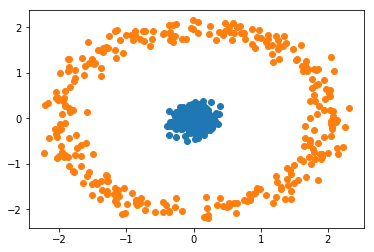

In [49]:
#point_and_circle?
X, Y = point_and_circle(num_samples=600)
plot_clusters(X, Y)

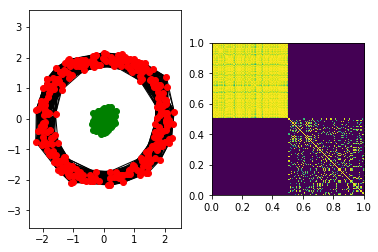

In [50]:
W = build_similarity_graph(X, var=1.0, eps=0.5, k=0)
plot_graph_matrix(X, Y, W)

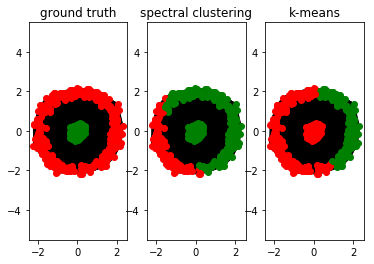

In [56]:
#Normal Laplacian
num_classes = 2
W = build_similarity_graph(X)
L = build_laplacian(W, laplacian_normalization='unn')
Y_rec = spectral_clustering(L, chosen_eig_indices= [1] , num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

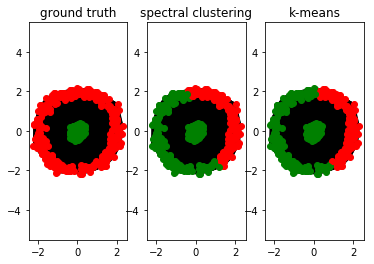

In [57]:
#Random-walk Laplacian
num_classes = 2
W = build_similarity_graph(X)
L = build_laplacian(W, laplacian_normalization='rw')
Y_rec = spectral_clustering(L, chosen_eig_indices= [1] , num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

### Q2.7: Using the function parameter_sensitivity, comment on the stability of spectral clustering when varying $\epsilon$ or k. 

In [ ]:
def parameter_sensitivity():
    """
    TO BE COMPLETED.

    A function to test spectral clustering sensitivity to parameter choice.
    """
    # the number of samples to generate
    num_samples = 500

    """
    Choose parameters
    """
    var = 1.0  # exponential_euclidean's sigma^2
    laplacian_normalization = 'unn'
    chosen_eig_indices = None

    """
    Choose candidate parameters
    """
    parameter_type = 'eps' # choose between 'k' or 'eps'
    parameter_candidate = np.arange(0,2,0.05)  # the number of neighbours for the graph (if 'k')
    #parameter_candidate = [1.0]  # or the epsilon threshold (if 'eps')
    parameter_performance = []

    for parameter in parameter_candidate:
        # Generate data
        X, Y = two_moons(num_samples, 1, 0.02)
        num_classes = len(np.unique(Y))
        
        parameter_wrap = {parameter_type: parameter}
        
        W = build_similarity_graph(X, **parameter_wrap)
        L = build_laplacian(W, laplacian_normalization)

        Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes)

        parameter_performance += [skm.adjusted_rand_score(Y, Y_rec)]

    plt.figure()
    plt.plot(parameter_candidate, parameter_performance)
    plt.title(f'parameter sensitivity ({parameter_type})')
    plt.show()

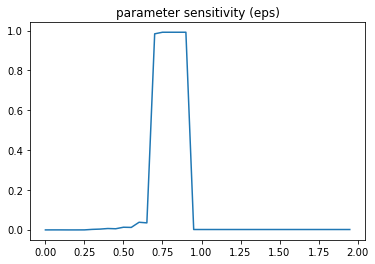

In [61]:
parameter_sensitivity() #for epsilon here 

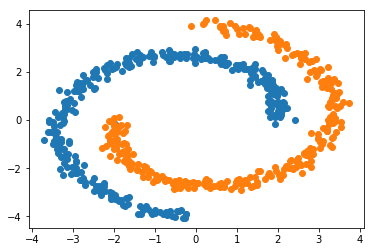

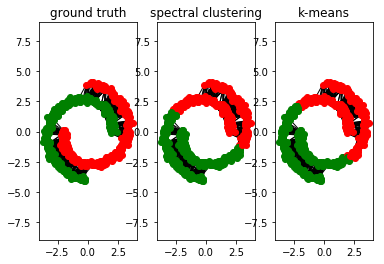

In [74]:
X, Y = two_moons(num_samples=600)
plot_clusters(X, Y)

num_classes = 2

similarities = build_similarity_graph(X)
W = build_similarity_graph(X,eps=0.5)
L = build_laplacian(W)
Y_rec = spectral_clustering(L, chosen_eig_indices=[1], num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

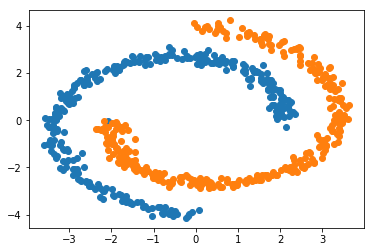

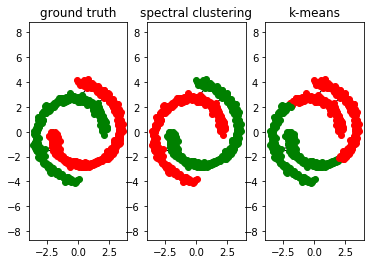

In [75]:
X, Y = two_moons(num_samples=600)
plot_clusters(X, Y)

num_classes = 2

similarities = build_similarity_graph(X)
W = build_similarity_graph(X,eps=0.8)
L = build_laplacian(W)
Y_rec = spectral_clustering(L, chosen_eig_indices=[1], num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

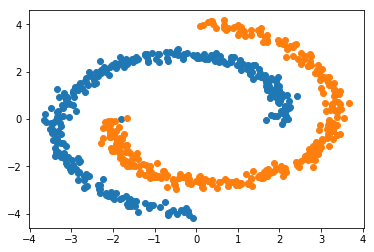

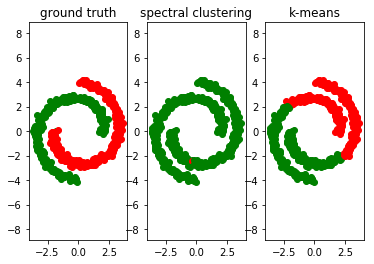

In [76]:
X, Y = two_moons(num_samples=600)
plot_clusters(X, Y)

num_classes = 2

similarities = build_similarity_graph(X)
W = build_similarity_graph(X,eps=1)
L = build_laplacian(W)
Y_rec = spectral_clustering(L, chosen_eig_indices=[1], num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

In [65]:
def parameter_sensitivity():
    """
    TO BE COMPLETED.

    A function to test spectral clustering sensitivity to parameter choice.
    """
    # the number of samples to generate
    num_samples = 500

    """
    Choose parameters
    """
    var = 1.0  # exponential_euclidean's sigma^2
    laplacian_normalization = 'unn'
    chosen_eig_indices = None

    """
    Choose candidate parameters
    """
    parameter_type = 'k' # choose between 'k' or 'eps'
    parameter_candidate = np.arange(2,166,3) # the number of neighbours for the graph (if 'k')
    #parameter_candidate = [1.0]  # or the epsilon threshold (if 'eps')
    parameter_performance = []

    for parameter in parameter_candidate:
        # Generate data
        X, Y = two_moons(num_samples, 1, 0.02)
        num_classes = len(np.unique(Y))
        
        parameter_wrap = {parameter_type: parameter}
        
        W = build_similarity_graph(X, **parameter_wrap)
        L = build_laplacian(W, laplacian_normalization)

        Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes)

        parameter_performance += [skm.adjusted_rand_score(Y, Y_rec)]

    plt.figure()
    plt.plot(parameter_candidate, parameter_performance)
    plt.title(f'parameter sensitivity ({parameter_type})')
    plt.show()

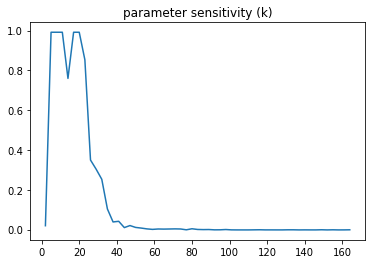

In [66]:
parameter_sensitivity() # for k here 

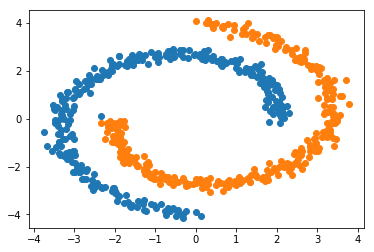

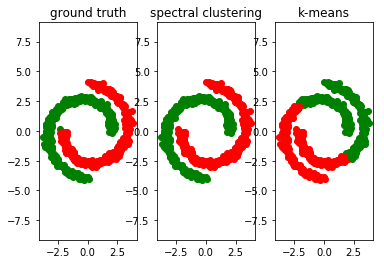

In [77]:
X, Y = two_moons(num_samples=600)
plot_clusters(X, Y)

num_classes = 2

similarities = build_similarity_graph(X)
W = build_similarity_graph(X,k=10)
L = build_laplacian(W)
Y_rec = spectral_clustering(L, chosen_eig_indices=[1], num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

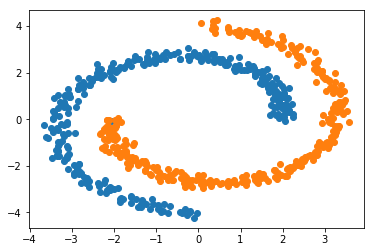

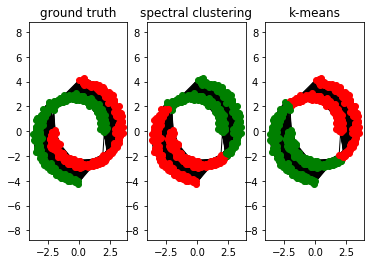

In [78]:
X, Y = two_moons(num_samples=600)
plot_clusters(X, Y)

num_classes = 2

similarities = build_similarity_graph(X)
W = build_similarity_graph(X,k=80)
L = build_laplacian(W)
Y_rec = spectral_clustering(L, chosen_eig_indices=[1], num_classes=num_classes)

# Plot results, comparing to KMeans
plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

The parameters clearly have an impact on our results. When we choose a parameter in the 'sensitive box', the clustering performs better.

### Q2.8: If we did not have access to "true" labels, how could we evaluate the clustering result (or what should we not use as evaluation)?

- **Internal Validation Metrics** such as Silhouette Score (measuring similarity of each sample to its own cluster compared to others), Calinski-Harabasz Index (ratio of between-cluster variance to within-cluster variance), and Davies-Bouldin Index (average similarity between each cluster and its closest cluster).

- **Unsupervised evaluation techniques** such as clustering stability, which measures the consistency of the clustering results for different realizations of the same algorithm on the same data.

### Q3.1: Complete all the code necessary, and cluster the `four_elements` and `fruit_salad` images in the data folder and include here some images of the clustering.  Explain your design choices in the overall pipeline (e.g. which graph, which pre-processing...) and how you think they impact the results you are seeing. Report also at least one failure mode for the algorithm.

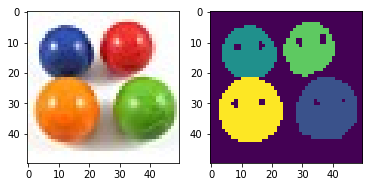

In [70]:
image_segmentation(input_img=path_to_data + 'four_elements.bmp', var = 0.1, k = 25, laplacian_normalization = 'rw', chosen_eig_indices = [1,2,3,4,5], num_classes = 5)

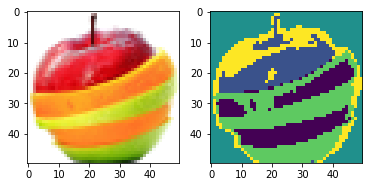

In [79]:
image_segmentation(input_img=path_to_data +'fruit_salad.bmp', var = 0.5, k = 10, laplacian_normalization = 'rw', chosen_eig_indices = [1,2,3,4,5], num_classes = 5)

### Q3.2: A full graph built between the pixels of a 50 × 50 image corresponds to $50^2$ nodes. Solving the full eigenvalue problem in this case would scale in the order of $2^{34}$ . Even on weak hardware this takes only seconds to minutes. Segmenting a Full HD picture of 1920 × 1080 would scale in the order of $2^{64}$ (about a month on a decent machine). Beyond that, the large picture would require to store in memory a graph over millions of nodes. A full graph on that scale requires about 1TB of memory. Can you think two simple techniques to reduce the computational and occupational cost of Spectral Clustering?

- **Dimensionality reduction:** Dimensionality reduction can significantly reduce the number of dimensions required to represent the eigenvectors, which can result in substantial reductions in both computational and memory costs.

- **Sparse graph construction:** By reducing the number of edges in the graph. The computational cost of solving the eigenvalue problem is proportional to the number of edges in the graph, so reducing the number of edges reduces the computational cost. 

### Q3.3: Choose a larger image of your choice, and try to implement some of the scalability modifications to run spectral clustering on it. Report some examples of the results you achieve. 